In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Mount Google Drive
drive.mount('/content/drive')

# Muat dataset
data = pd.read_csv('/content/drive/My Drive/NLP2023/tripadvisor_hotel_reviews.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Membersihkan teks
data['Review'] = data['Review'].str.replace('[^\w\s]', '').str.lower()

# Menggunakan CountVectorizer untuk mengonversi teks menjadi matriks
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['Review'])


<ipython-input-5-1f877139a650>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Review'] = data['Review'].str.replace('[^\w\s]', '').str.lower()


In [6]:
# Membuat model LDA
n_topics = 10  # Ganti dengan jumlah topik yang diinginkan
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(dtm)


LatentDirichletAllocation(random_state=42)

In [7]:
# Mendapatkan kata-kata utama dalam setiap topik
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topik {topic_idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")


Topik 1:
['just', 'staff', 'good', 'beach', 'service', 'did', 'great', 'resort', 'nt', 'food']


Topik 2:
['stayed', 'did', 'bathroom', 'night', 'stay', 'bed', 'rooms', 'nt', 'hotel', 'room']


Topik 3:
['room', 'just', 'walk', 'breakfast', 'barcelona', 'location', 'city', 'good', 'great', 'hotel']


Topik 4:
['aqua', 'honolulu', 'diamond', 'floor', 'room', 'hawaii', 'view', 'ocean', 'beach', 'waikiki']


Topik 5:
['day', 'nice', 'food', 'resort', 'room', 'great', 'did', 'good', 'pool', 'beach']


Topik 6:
['stay', 'rooms', 'nice', 'small', 'breakfast', 'nt', 'location', 'good', 'room', 'hotel']


Topik 7:
['food', 'service', 'stayed', 'excellent', 'good', 'room', 'great', 'pool', 'staff', 'hotel']


Topik 8:
['clean', 'rooms', 'nice', 'stayed', 'room', 'staff', 'location', 'stay', 'great', 'hotel']


Topik 9:
['staff', 'told', 'day', 'stay', 'service', 'desk', 'did', 'nt', 'hotel', 'room']


Topik 10:
['room', 'food', 'just', 'great', 'time', 'good', 'did', 'resort', 'nt', 'beach']




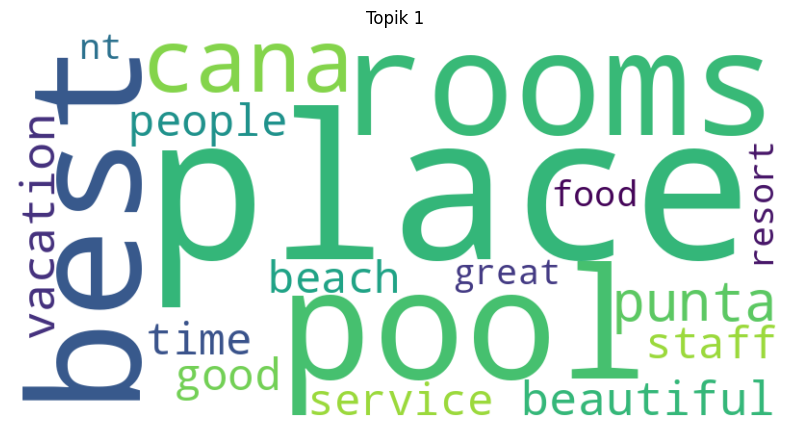

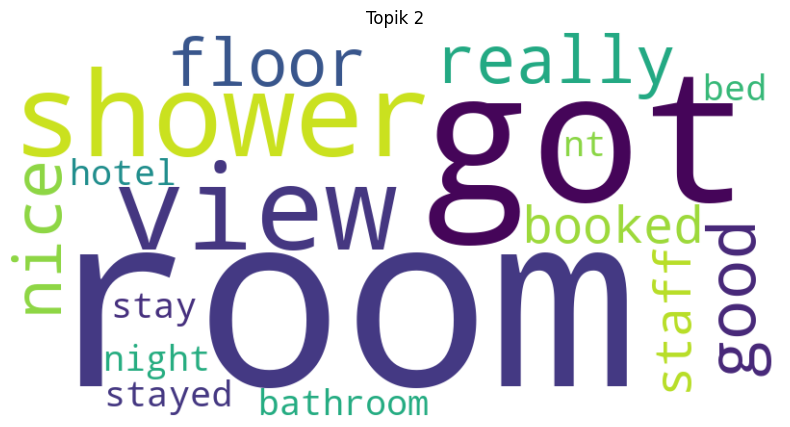

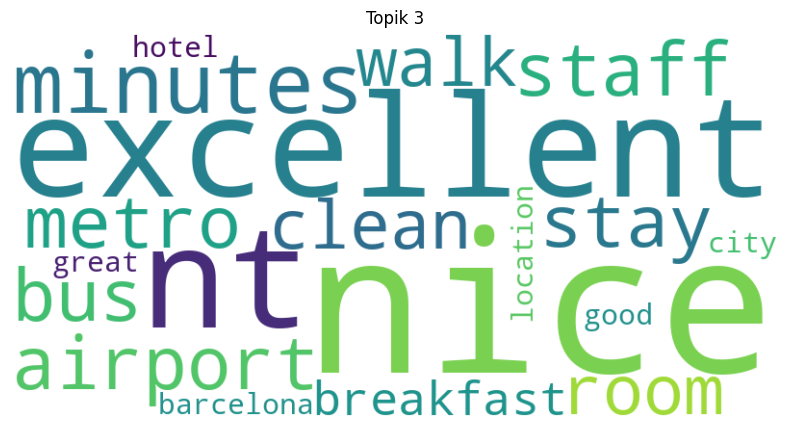

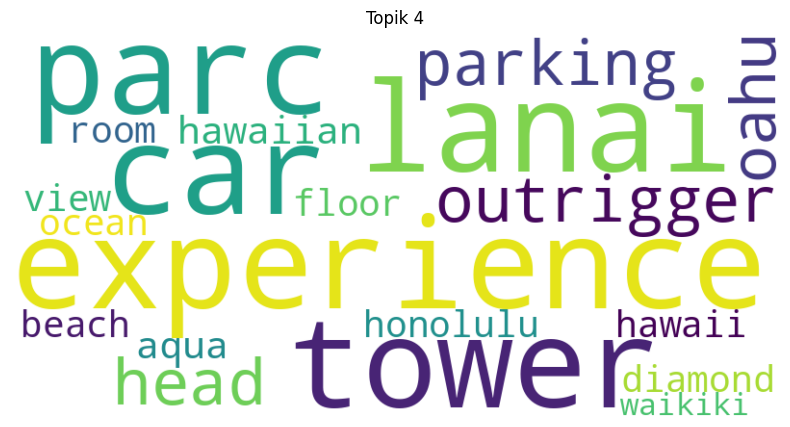

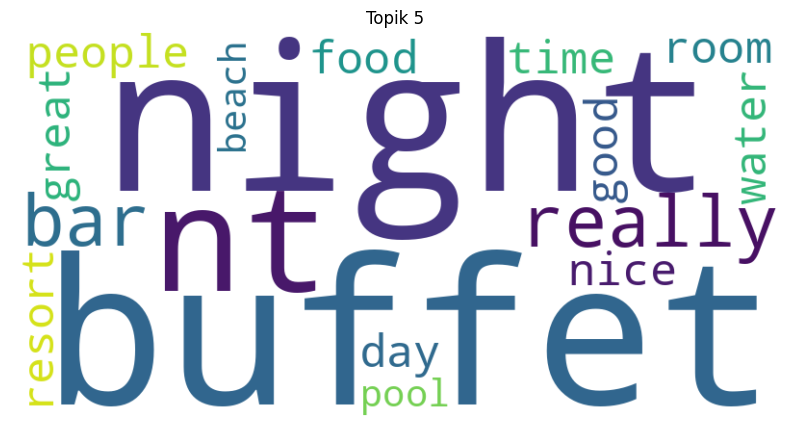

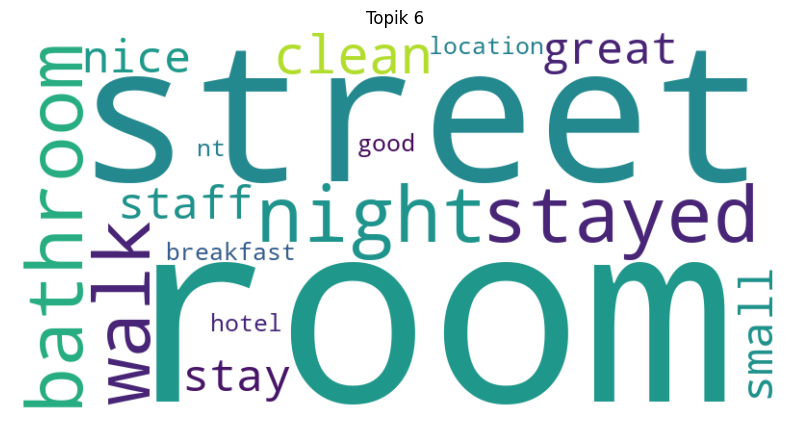

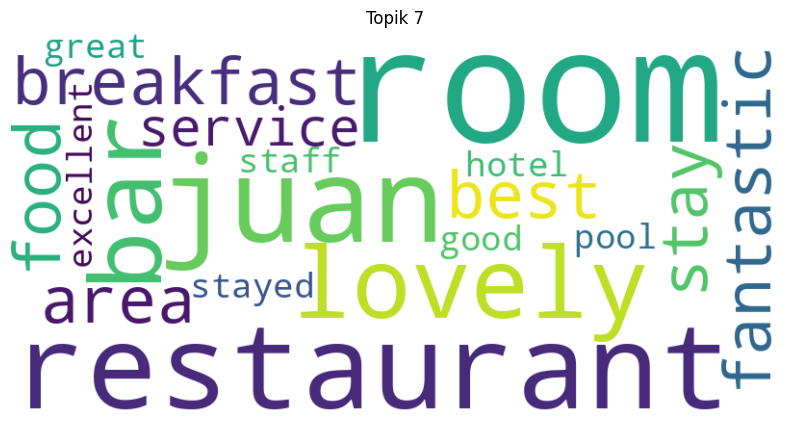

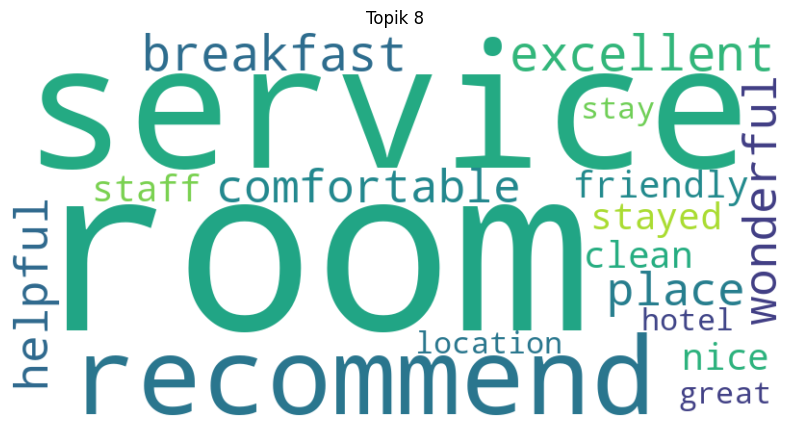

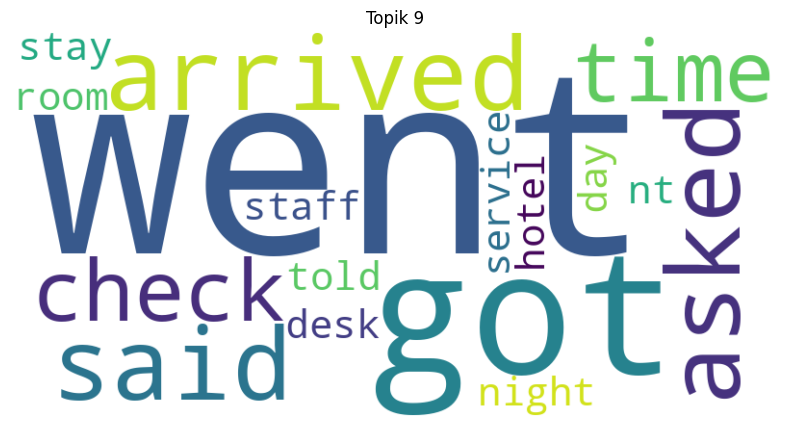

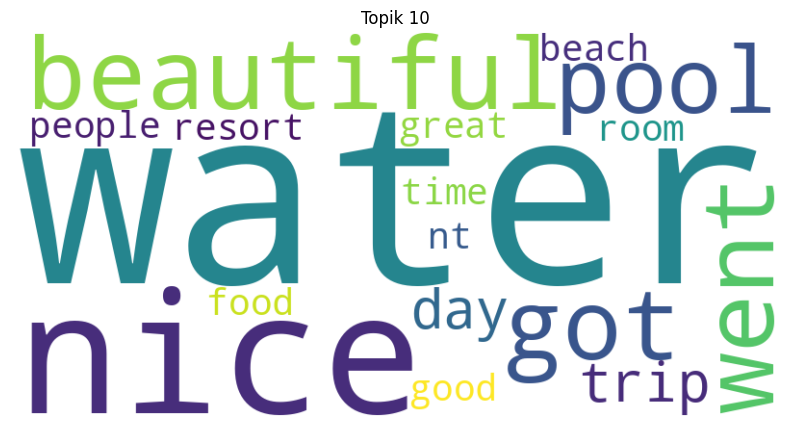

In [8]:
from wordcloud import WordCloud

# Membuat visualisasi kata-kata utama dalam setiap topik
for topic_idx, topic in enumerate(lda.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-20:]]))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topik {topic_idx + 1}")
    plt.show()
